In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# Importing CIFAR10 Dataset from Keras

In [2]:
cifar10 = keras.datasets.cifar10
(x_train,y_train), (x_test,y_test) = cifar10.load_data()
print(x_train.shape,y_train.shape)

(50000, 32, 32, 3) (50000, 1)


# Normalize and Plot Raw Data

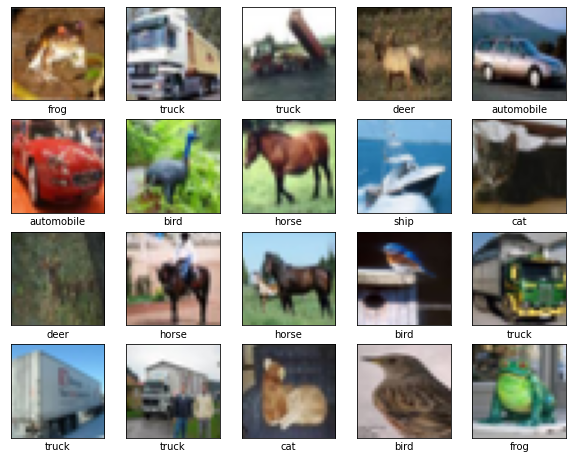

In [3]:
# change data type from integer to float 32
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Then we normalize the data from 0 to 255 become 0 to 1
x_train,x_test = x_train/255.0, x_test/255.0
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    # Need extra index because labels are an array
    plt.xlabel(class_names[y_train[i][0]])
plt.show()

# Building the Model

In [4]:
model = keras.models.Sequential([
    keras.layers.Conv2D(32, (3,3), strides=(1,1), padding="valid", activation='relu', input_shape=(32,32,3)),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Conv2D(32, 3, activation='relu'),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10),
])

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                73792     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                6

# Compiling Model

In [5]:
optim = keras.optimizers.Adam(lr=0.001)
metrics = ["accuracy"]
loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True) 
model.compile(loss=loss, optimizer=optim, metrics=metrics)

# Training the Model

In [6]:
batch_size = 64
epochs = 20
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=2)

Train on 50000 samples
Epoch 1/20
50000/50000 - 101s - loss: 1.5415 - accuracy: 0.4456
Epoch 2/20
50000/50000 - 96s - loss: 1.2016 - accuracy: 0.5767
Epoch 3/20
50000/50000 - 97s - loss: 1.0792 - accuracy: 0.6228
Epoch 4/20
50000/50000 - 95s - loss: 0.9991 - accuracy: 0.6505
Epoch 5/20
50000/50000 - 94s - loss: 0.9481 - accuracy: 0.6710
Epoch 6/20
50000/50000 - 95s - loss: 0.8972 - accuracy: 0.6863
Epoch 7/20
50000/50000 - 95s - loss: 0.8528 - accuracy: 0.7038
Epoch 8/20
50000/50000 - 94s - loss: 0.8169 - accuracy: 0.7169
Epoch 9/20
50000/50000 - 94s - loss: 0.7799 - accuracy: 0.7276
Epoch 10/20
50000/50000 - 94s - loss: 0.7448 - accuracy: 0.7409
Epoch 11/20
50000/50000 - 94s - loss: 0.7185 - accuracy: 0.7503
Epoch 12/20
50000/50000 - 94s - loss: 0.6838 - accuracy: 0.7625
Epoch 13/20
50000/50000 - 94s - loss: 0.6628 - accuracy: 0.7689
Epoch 14/20
50000/50000 - 94s - loss: 0.6368 - accuracy: 0.7785
Epoch 15/20
50000/50000 - 94s - loss: 0.6150 - accuracy: 0.7849
Epoch 16/20
50000/50000 -

# Evaluating the Model

In [7]:
model.evaluate(x_test, y_test, batch_size=batch_size,verbose=2)

10000/1 - 8s - loss: 1.0888 - accuracy: 0.6994


[0.9836337356567383, 0.6994]